# Importing and Reading Files

In [1]:
import geopy 
from geopy.geocoders import Nominatim 
import time
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

#method = 'box-cox' or 'yeo-johnson'
from sklearn import preprocessing


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
#main housing data
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
## Do an inner join and groupby on this
#first import zipcode csv from king co website
dfz = pd.read_csv('data/Zipcodes_for_King_County_and_Surrounding_Area_(Shorelines)___zipcode_shore_area.csv')

# Preliminary Exploration and Data Cleaning

In [4]:
df[df.duplicated(keep=False)].sort_values(by='address').head()
#checking for duplicated rows

id       date      price  bedrooms  bathrooms  sqft_living  \
4845  1233100736  9/28/2021  2600000.0         3        4.0         3500   
4846  1233100736  9/28/2021  2600000.0         3        4.0         3500   

      sqft_lot  floors waterfront greenbelt  ... sewer_system sqft_above  \
4845      8455     2.0         NO        NO  ...       PUBLIC       2590   
4846      8455     2.0         NO        NO  ...       PUBLIC       2590   

     sqft_basement sqft_garage sqft_patio yr_built  yr_renovated  \
4845          1410         500        290     2019             0   
4846          1410         500        290     2019             0   

                                                address       lat        long  
4845  12611 Northeast 87th Place, Kirkland, Washingt...  47.68069 -122.172135  
4846  12611 Northeast 87th Place, Kirkland, Washingt...  47.68069 -122.172135  

[2 rows x 25 columns]

In [5]:
# all zip codes for King County
# source : https://www.zillow.com/browse/homes/wa/king-county/
KCoZips =  [98052, 98092, 98115, 98103, 98003, 98023, 98105, 98042, 98034, 98133, 98118, 98125, 98058, 
            98031, 98122, 98033, 98032, 98004, 98059, 98001, 98006, 98056, 98030, 98155, 98168, 98117, 
            98002, 98198, 98038, 98029, 98027, 98109, 98074, 98144, 98007, 98040, 98072, 98146, 98011, 
            98107, 98106, 98188, 98008, 98178, 98108, 98075, 98028, 98112, 98119, 98055, 98053, 98102, 
            98022, 98126, 98116, 98005, 98121, 98199, 98177, 98166, 98136, 98045, 98077, 98101, 98057,
            98065, 98104, 98019, 98148, 98014, 98354, 98070, 98010, 98024, 98051, 98047, 98151, 98251,
            98134, 98039, 98195, 98158, 98154, 98161, 98174, 98068, 98256, 98288, 98050, 98132, 98171,
            98184, 98054, 98164, 98181, 98224, 98191, 98009, 98013, 98015, 98025, 98035, 98041, 98062, 
            98064, 98063, 98071, 98073, 98083, 98089, 98093, 98111, 98113, 98114, 98124, 98127, 98131, 
            98129, 98139, 98138, 98141, 98145, 98160, 98165, 98170, 98175, 98185, 98190, 98194, 98471,
            98481]

In [6]:
#amount of zip cods for king county
len(KCoZips)

131

In [7]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

In [8]:
# indexing zip code from address column
# also checking through data for non washington addresses

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

df['address'].sort_values(ascending=False)

#looks like there are addresses from outside of King County

11749                                                          Winslow Place, Corona, California 92879, United States
2789                                                           Winslow Place, Corona, California 92879, United States
19738                                                          Winslow Place, Corona, California 92879, United States
21043                                                         Whitman Ave N, Seattle, Washington 98103, United States
7868                                                     West Newton Street, Seattle, Washington 98199, United States
24933                                                    West Boston Street, Seattle, Washington 98199, United States
15553                                                    West Boston Street, Seattle, Washington 98199, United States
10280                                                         West 14th Avenue, Golden, Colorado 80401, United States
27271                                                   

In [9]:
# resets output displays
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.max_colwidth')

In [10]:
# looking at the imported zipcodes csv file
dfz.info()
# so we need to convert the zipcode from df to an integer in order to merge with dfz

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OBJECTID        209 non-null    int64  
 1   ZIP             209 non-null    int64  
 2   ZIPCODE         209 non-null    int64  
 3   COUNTY          209 non-null    int64  
 4   ZIP_TYPE        209 non-null    object 
 5   COUNTY_NAME     209 non-null    object 
 6   PREFERRED_CITY  209 non-null    object 
 7   Shape_Length    209 non-null    float64
 8   Shape_Area      209 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 14.8+ KB


In [11]:
# creating zipcodes column by slicing the address column
df['zipcodes'] = df['address'].apply(lambda x: x[-20:-15])

In [12]:
# zipcodes in King Co imported table in integer format, but string in our dataframe
# need to convert zipcode column into integer
df['zipcodes'] = df['zipcodes'].apply(lambda x: int(x))

In [13]:
df['zipcodes'].value_counts()

98042    992
98038    858
98103    761
98115    761
98117    748
        ... 
68504      1
80210      1
50161      1
68632      1
58042      1
Name: zipcodes, Length: 399, dtype: int64

In [14]:
# removing zip codes that are not in King County
# data from king county GIS included surrounding areas
df = df[df['zipcodes'].isin(KCoZips)]

In [15]:
# only including the relevant columns from GIS dataset
dfz = dfz[['ZIPCODE', 'PREFERRED_CITY']]

In [16]:
# checking the rows before merge
df.shape

(29215, 26)

In [17]:
# mergeeeee
df = df.merge(dfz, how = 'left', left_on = 'zipcodes', right_on = 'ZIPCODE')

In [18]:
# WE REDUCED OUR CATEGORICALS TO 40 FROM 400

In [19]:
# checking rows and nulls after merge and dropna
df = df.dropna()
df.info()
# there seems to be duplicate values since the values went up

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31737 entries, 0 to 31781
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              31737 non-null  int64  
 1   date            31737 non-null  object 
 2   price           31737 non-null  float64
 3   bedrooms        31737 non-null  int64  
 4   bathrooms       31737 non-null  float64
 5   sqft_living     31737 non-null  int64  
 6   sqft_lot        31737 non-null  int64  
 7   floors          31737 non-null  float64
 8   waterfront      31737 non-null  object 
 9   greenbelt       31737 non-null  object 
 10  nuisance        31737 non-null  object 
 11  view            31737 non-null  object 
 12  condition       31737 non-null  object 
 13  grade           31737 non-null  object 
 14  heat_source     31737 non-null  object 
 15  sewer_system    31737 non-null  object 
 16  sqft_above      31737 non-null  int64  
 17  sqft_basement   31737 non-null 

In [20]:
#checking for duplicates specifically
df[df.duplicated(keep=False)].sort_values(by='address').shape

(5126, 28)

In [21]:
# dropping duplicates
df = df.drop_duplicates(subset=['address'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29015 entries, 0 to 31781
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              29015 non-null  int64  
 1   date            29015 non-null  object 
 2   price           29015 non-null  float64
 3   bedrooms        29015 non-null  int64  
 4   bathrooms       29015 non-null  float64
 5   sqft_living     29015 non-null  int64  
 6   sqft_lot        29015 non-null  int64  
 7   floors          29015 non-null  float64
 8   waterfront      29015 non-null  object 
 9   greenbelt       29015 non-null  object 
 10  nuisance        29015 non-null  object 
 11  view            29015 non-null  object 
 12  condition       29015 non-null  object 
 13  grade           29015 non-null  object 
 14  heat_source     29015 non-null  object 
 15  sewer_system    29015 non-null  object 
 16  sqft_above      29015 non-null  int64  
 17  sqft_basement   29015 non-null 

# Data Exploration Base Model

In [22]:
X = df.drop(columns = ['price'])
y = df['price']

In [23]:
X.corr()

id  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
id             1.000000 -0.006043  -0.013962    -0.028218 -0.121127  0.032791   
bedrooms      -0.006043  1.000000   0.594510     0.629503 -0.000756  0.206114   
bathrooms     -0.013962  0.594510   1.000000     0.780958  0.038990  0.433211   
sqft_living   -0.028218  0.629503   0.780958     1.000000  0.118097  0.368062   
sqft_lot      -0.121127 -0.000756   0.038990     0.118097  1.000000 -0.018161   
floors         0.032791  0.206114   0.433211     0.368062 -0.018161  1.000000   
sqft_above    -0.022402  0.536092   0.681687     0.881266  0.128033  0.518943   
sqft_basement -0.016232  0.234312   0.260994     0.335763  0.001942 -0.241797   
sqft_garage   -0.007142  0.302579   0.461847     0.501736  0.084134  0.190244   
sqft_patio    -0.043077  0.193138   0.334317     0.407442  0.157526  0.124782   
yr_built       0.020605  0.188908   0.457914     0.335366  0.014437  0.515694   
yr_renovated  -0.028657  0.010440   0.043147     0.035172  0.007379 -0.013332   
lat           -0.001818 -0.017253   0.045854     0.048289 -0.073750  0.043654   
long           0.009800  0.130621   0.178014     0.230625  0.182678  0.097289   
zipcodes      -0.004192 -0.159889  -0.179152    -0.191074 -0.095724 -0.042282   
ZIPCODE       -0.004192 -0.159889  -0.179152    -0.191074 -0.095724 -0.042282   

               sqft_above  sqft_basement  sqft_garage  sqft_patio  yr_built  \
id              -0.022402      -0.016232    -0.007142   -0.043077  0.020605   
bedrooms         0.536092       0.234312     0.302579    0.193138  0.188908   
bathrooms        0.681687       0.260994     0.461847    0.334317  0.457914   
sqft_living      0.881266       0.335763     0.501736    0.407442  0.335366   
sqft_lot         0.128033       0.001942     0.084134    0.157526  0.014437   
floors           0.518943      -0.241797     0.190244    0.124782  0.515694   
sqft_above       1.000000      -0.074724     0.552206    0.322274  0.435209   
sqft_basement   -0.074724       1.000000     0.015415    0.214800 -0.225876   
sqft_garage      0.552206       0.015415     1.000000    0.229089  0.505586   
sqft_patio       0.322274       0.214800     0.229089    1.000000  0.136616   
yr_built         0.435209      -0.225876     0.505586    0.136616  1.000000   
yr_renovated     0.006848       0.052351    -0.105415    0.058015 -0.237007   
lat             -0.023563       0.189264    -0.131351    0.011563 -0.158600   
long             0.335617      -0.223557     0.374833    0.122668  0.361291   
zipcodes        -0.262618       0.162453    -0.360266   -0.106212 -0.306125   
ZIPCODE         -0.262618       0.162453    -0.360266   -0.106212 -0.306125   

               yr_renovated       lat      long  zipcodes   ZIPCODE  
id                -0.028657 -0.001818  0.009800 -0.004192 -0.004192  
bedrooms           0.010440 -0.017253  0.130621 -0.159889 -0.159889  
bathrooms          0.043147  0.045854  0.178014 -0.179152 -0.179152  
sqft_living        0.035172  0.048289  0.230625 -0.191074 -0.191074  
sqft_lot           0.007379 -0.073750  0.182678 -0.095724 -0.095724  
floors            -0.013332  0.043654  0.097289 -0.042282 -0.042282  
sqft_above         0.006848 -0.023563  0.335617 -0.262618 -0.262618  
sqft_basement      0.052351  0.189264 -0.223557  0.162453  0.162453  
sqft_garage       -0.105415 -0.131351  0.374833 -0.360266 -0.360266  
sqft_patio         0.058015  0.011563  0.122668 -0.106212 -0.106212  
yr_built          -0.237007 -0.158600  0.361291 -0.306125 -0.306125  
yr_renovated       1.000000  0.042543 -0.060468  0.062327  0.062327  
lat                0.042543  1.000000 -0.181921  0.303531  0.303531  
long              -0.060468 -0.181921  1.000000 -0.522803 -0.522803  
zipcodes           0.062327  0.303531 -0.522803  1.000000  1.000000  
ZIPCODE            0.062327  0.303531 -0.522803  1.000000  1.000000

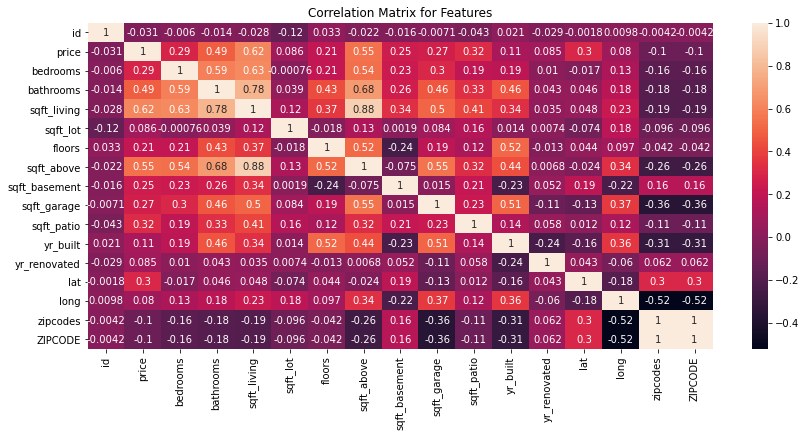

In [24]:
# using heat map to check correlations

plt.figure(figsize=(14, 6))
sns.heatmap(df.corr(), annot=True)

plt.title('Correlation Matrix for Features')
plt.savefig("corrmat.jpg", dpi = 300)
plt.show()

#we see sqft_living has the highest correlation to price

TypeError: Categorical is not ordered for operation min
you can use .as_ordered() to change the Categorical to an ordered one


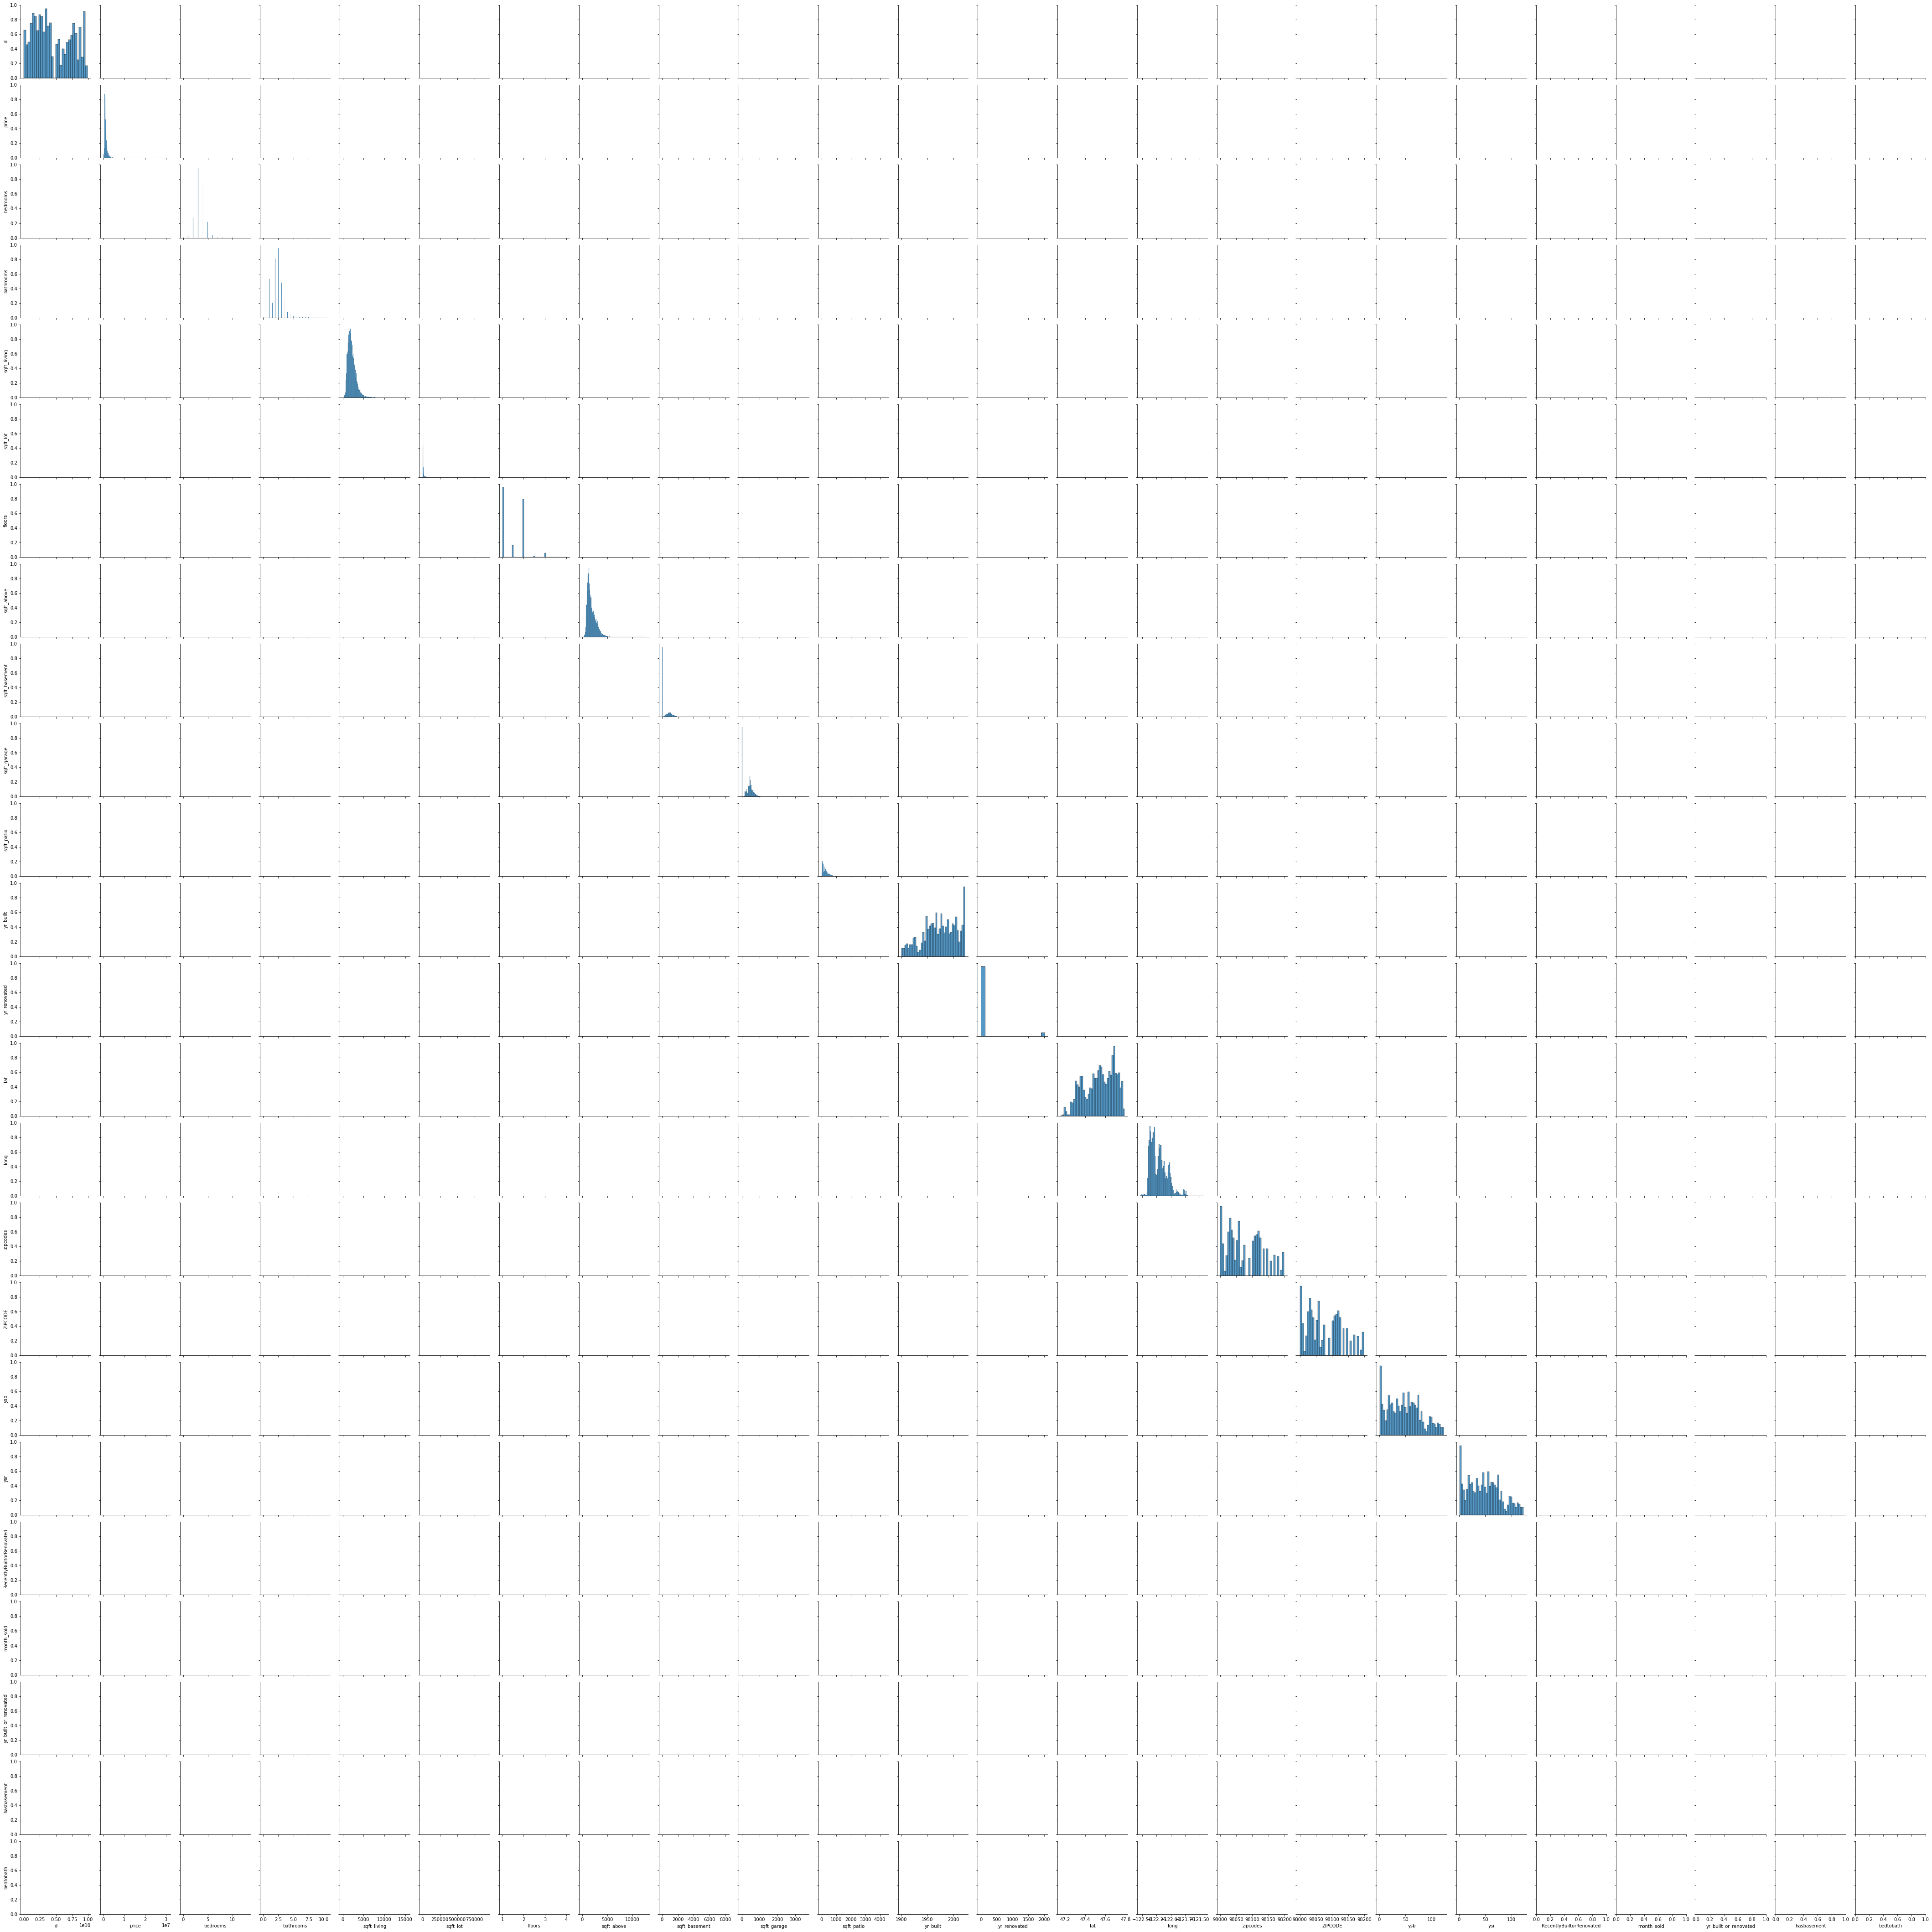

In [96]:
sns.pairplot(df)
# we looked at this often, but we don't run it everytime since it takes a while to load

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

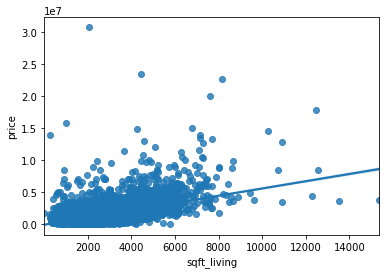

In [26]:
sns.regplot(x =df['sqft_living'],y = df['price'])
# the relationship between price and sqft living

In [27]:
# THIS IS OUR BASE MODEL

X = df[['sqft_living']]
y = df['price']

lr= LinearRegression()
lr.fit(X,y)
lr.score(X,y)

0.3803731090091207

# Data Exploration

<AxesSubplot:xlabel='bedrooms', ylabel='Count'>

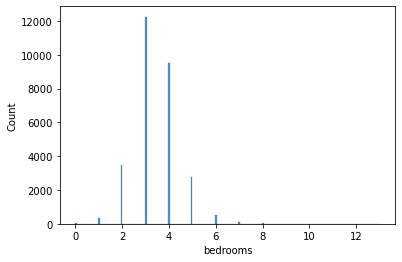

In [28]:
# just checking out bedrooms distribution
sns.histplot(data = df['bedrooms'])

In [29]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long', 'zipcodes', 'ZIPCODE',
       'PREFERRED_CITY'],
      dtype='object')

In [30]:
#looking at the highest and lowest mean price by preferred city
df.groupby('PREFERRED_CITY')['price'].mean().sort_values(ascending=False)

PREFERRED_CITY
MEDINA           5.319170e+06
MERCER ISLAND    2.761960e+06
BELLEVUE         2.149155e+06
SAMMAMIISH       1.903189e+06
SAMMAMISH        1.707086e+06
KIRKLAND         1.640557e+06
PRESTON          1.600500e+06
REDMOND          1.563663e+06
WOODINVILLE      1.550504e+06
FALL CITY        1.539561e+06
ISSAQUAH         1.462132e+06
BOTHELL          1.202928e+06
SNOQUALMIE       1.173838e+06
KENMORE          1.083541e+06
NORTH BEND       1.062900e+06
SEATTLE          1.016644e+06
VASHON           9.884233e+05
CARNATION        9.740629e+05
DUVALL           9.723781e+05
RAVENSDALE       9.540643e+05
RENTON           8.823328e+05
BLACK DIAMOND    8.342228e+05
MAPLE VALLEY     8.072041e+05
ENUMCLAW         6.485286e+05
KENT             6.477059e+05
AUBURN           6.245891e+05
FEDERAL WAY      6.138539e+05
MILTON           5.741593e+05
GOLD BAR         5.153000e+05
PACIFIC          4.929118e+05
SKYKOMISH        4.572688e+05
BARING           2.546667e+05
Name: price, dtype: float

In [31]:
(df['PREFERRED_CITY'] == 'PRESTON').value_counts()
# noticed some preferred cities have very low counts, could be outliers

False    29013
True         2
Name: PREFERRED_CITY, dtype: int64

In [32]:
df.shape

(29015, 28)

# Data Cleaning and Transformation

In [33]:
# checking value counts by city to look for outliers to drop
df['PREFERRED_CITY'].value_counts()

SEATTLE          11829
RENTON            2130
KENT              2083
AUBURN            1595
BELLEVUE          1575
KIRKLAND          1296
FEDERAL WAY       1135
REDMOND            961
MAPLE VALLEY       856
ISSAQUAH           703
WOODINVILLE        579
NORTH BEND         464
ENUMCLAW           457
SAMMAMISH          427
SAMMAMIISH         411
MERCER ISLAND      349
KENMORE            347
BLACK DIAMOND      313
SNOQUALMIE         292
BOTHELL            259
DUVALL             244
VASHON             191
CARNATION          156
FALL CITY          114
PACIFIC             77
RAVENSDALE          66
MEDINA              59
MILTON              23
SKYKOMISH           16
GOLD BAR             3
BARING               3
PRESTON              2
Name: PREFERRED_CITY, dtype: int64

In [34]:
# dropping 5 cities with least value counts
citylist = ['MILTON', 'SKYKOMISH', 'BARING', 'GOLD BAR', 'PRESTON']
df = df[~df['PREFERRED_CITY'].isin(citylist)]

In [35]:
# dropping any rows that have a sqft lot of over 800k
df = df[df['sqft_lot'] < 1000000]

In [36]:
# creating recently built or renovated column to include in model
# ysb is years since built
# ysr is years since renovated
df['ysb'] = 2023 - df['yr_built']
df['ysr'] = 2023 - df['yr_built']
df['RecentlyBuiltorRenovated'] = (df['ysb'] < 20) | (df['ysr'] < 10)

In [37]:
# creating a column for month sold to put into our model
df['date'] = pd.to_datetime(df['date'])
df['month_sold'] = df['date'].dt.month

In [38]:
# creating a new variable that combines year built and year renovated into values that show whatever happened last
df['yr_built_or_renovated'] = df.apply(lambda row: row['yr_renovated'] if row['yr_renovated'] != 0 else row['yr_built'], axis=1)

In [39]:
# we noticed sqft basement had a lot of 0 values, so we changed it into a binary
df['hasbasement'] = df['sqft_basement'] != 0

In [40]:
df['hasbasement'].value_counts()

False    15028
True     13928
Name: hasbasement, dtype: int64

In [41]:
# trying out multiplying these two variables to see if it helps our models
df['bedtobath'] = df['bedrooms'] * df['bathrooms']

In [42]:
# noticed 7 outliers
df['sewer_system'].value_counts()

PUBLIC                24652
PRIVATE                4297
PRIVATE RESTRICTED        5
PUBLIC RESTRICTED         2
Name: sewer_system, dtype: int64

In [43]:
# got rid of 7 outliers
df = df[df['sewer_system'].isin(['PUBLIC','PRIVATE'])]

# Ordinal Encoding

In [44]:
# checking all options for each column that should be ordinally encoded
df['grade'].unique()

array(['7 Average', '9 Better', '8 Good', '6 Low Average', '10 Very Good',
       '5 Fair', '11 Excellent', '12 Luxury', '4 Low', '13 Mansion',
       '3 Poor', '2 Substandard'], dtype=object)

In [45]:
df['condition'].unique()

array(['Good', 'Average', 'Very Good', 'Fair', 'Poor'], dtype=object)

In [46]:
df['view'].unique()

array(['NONE', 'AVERAGE', 'EXCELLENT', 'FAIR', 'GOOD'], dtype=object)

In [47]:
df['waterfront'].unique()

array(['NO', 'YES'], dtype=object)

In [48]:
df['nuisance'].unique()

array(['NO', 'YES'], dtype=object)

In [49]:
df['greenbelt'].unique()

array(['NO', 'YES'], dtype=object)

In [50]:
df['RecentlyBuiltorRenovated'].unique()

array([False,  True])

In [51]:
#making these columns into categories so that we can reorder them and ordinally encode them
df['condition'] = df['condition'].astype('category')
df['grade'] = df['grade'].astype('category')
df['view'] = df['view'].astype('category')
df['waterfront'] = df['waterfront'].astype('category')
df['nuisance'] = df['nuisance'].astype('category')
df['greenbelt'] = df['greenbelt'].astype('category')
df['RecentlyBuiltorRenovated'] = df['RecentlyBuiltorRenovated'].astype('category')

In [52]:
# reordering columns
df['condition'] = df['condition'].cat.reorder_categories(['Poor', 'Fair', 'Average','Good', 'Very Good'])
df['grade'] = df['grade'].cat.reorder_categories(['2 Substandard', '3 Poor', '4 Low', '5 Fair', 
                                                  '6 Low Average', '7 Average', '8 Good', '9 Better',
                                                  '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion'])
df['view'] = df['view'].cat.reorder_categories(['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT'])
df['waterfront'] = df['waterfront'].cat.reorder_categories(['NO', 'YES'])
df['nuisance'] = df['nuisance'].cat.reorder_categories(['NO', 'YES'])
df['greenbelt'] = df['greenbelt'].cat.reorder_categories(['NO', 'YES'])
df['RecentlyBuiltorRenovated'] = df['RecentlyBuiltorRenovated'].cat.reorder_categories([False, True])

In [53]:
# checking work
print(df['grade'].cat.codes)
print(df['condition'].cat.codes)
print(df['view'].cat.codes)
print(df['waterfront'].cat.codes)
print(df['nuisance'].cat.codes)
print(df['greenbelt'].cat.codes)
print(df['RecentlyBuiltorRenovated'].cat.codes)

0        5
1        5
2        5
3        7
4        5
        ..
31777    6
31778    5
31779    5
31780    6
31781    5
Length: 28949, dtype: int8
0        3
1        2
2        2
3        2
4        2
        ..
31777    3
31778    2
31779    2
31780    2
31781    2
Length: 28949, dtype: int8
0        0
1        2
2        2
3        2
4        0
        ..
31777    0
31778    1
31779    0
31780    0
31781    0
Length: 28949, dtype: int8
0        0
1        0
2        0
3        0
4        0
        ..
31777    0
31778    0
31779    0
31780    0
31781    0
Length: 28949, dtype: int8
0        0
1        1
2        0
3        0
4        1
        ..
31777    0
31778    0
31779    1
31780    0
31781    0
Length: 28949, dtype: int8
0        0
1        0
2        0
3        0
4        0
        ..
31777    0
31778    0
31779    0
31780    0
31781    0
Length: 28949, dtype: int8
0        0
1        0
2        0
3        1
4        1
        ..
31777    0
31778    1
31779    0
31780    1
31

In [54]:
# this is where we encoded these variables
ord_cat_selector = ['condition', 'grade', 'view', 'waterfront', 'nuisance', 'greenbelt', 'RecentlyBuiltorRenovated']
cat_subset = df[ord_cat_selector]
grade_ls = ['2 Substandard', '3 Poor', '4 Low', '5 Fair', 
            '6 Low Average', '7 Average', '8 Good', '9 Better',
            '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion']
cond_ls = ['Poor', 'Fair', 'Average','Good', 'Very Good']
view_ls = ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']
wf_ls = ['NO', 'YES']
nuisance_ls = ['NO', 'YES']
gb_ls = ['NO', 'YES']
RBoR = [False, True]
o_enc = OrdinalEncoder(categories = [cond_ls, grade_ls, view_ls, wf_ls, nuisance_ls, gb_ls, RBoR])
o_enc.fit(cat_subset)

OrdinalEncoder(categories=[['Poor', 'Fair', 'Average', 'Good', 'Very Good'],
                           ['2 Substandard', '3 Poor', '4 Low', '5 Fair',
                            '6 Low Average', '7 Average', '8 Good', '9 Better',
                            '10 Very Good', '11 Excellent', '12 Luxury',
                            '13 Mansion'],
                           ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT'],
                           ['NO', 'YES'], ['NO', 'YES'], ['NO', 'YES'],
                           [False, True]])

In [55]:
# transforming and creating a dataframe from these columns
X_subset = pd.DataFrame(o_enc.transform(cat_subset),
                        columns = cat_subset.columns)

In [56]:
o_enc.inverse_transform(X_subset)

array([['Good', '7 Average', 'NONE', ..., 'NO', 'NO', False],
       ['Average', '7 Average', 'AVERAGE', ..., 'YES', 'NO', False],
       ['Average', '7 Average', 'AVERAGE', ..., 'NO', 'NO', False],
       ...,
       ['Average', '7 Average', 'NONE', ..., 'YES', 'NO', False],
       ['Average', '8 Good', 'NONE', ..., 'NO', 'NO', True],
       ['Average', '7 Average', 'NONE', ..., 'NO', 'NO', False]],
      dtype=object)

In [57]:
# renaming columns so they appear different when we concat them back to the dataframe
X_subset = X_subset.rename(columns = {'condition': 'house_cond','grade':'grade2', 
                                      'view':'view2', 'waterfront': 'wf2', 
                                      'nuisance':'nuisance2', 'greenbelt': 'greenbelt2', 'RecentlyBuiltorRenovated' : 'RBoR2'}) 

In [58]:
# concat new ordinal encoded columns into a new dataframe
df1 = pd.concat([df.reset_index(), X_subset], axis =1)

In [59]:
# checking columns
df1.columns

Index(['index', 'id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long', 'zipcodes', 'ZIPCODE',
       'PREFERRED_CITY', 'ysb', 'ysr', 'RecentlyBuiltorRenovated',
       'month_sold', 'yr_built_or_renovated', 'hasbasement', 'bedtobath',
       'house_cond', 'grade2', 'view2', 'wf2', 'nuisance2', 'greenbelt2',
       'RBoR2'],
      dtype='object')

In [60]:
# now that we converted grade into an ordinal category, we can square the values of the columns
# the relationship between grade and price looks exponential
df1['gradesquared'] = df1['grade2'] ** 2

# Test Train Split

In [61]:
col_selector = ['house_cond', 'grade2', 'sqft_living', 'sqft_above', 'sqft_basement', 'bedrooms', 'bathrooms', 
                'zipcodes', 'nuisance2', 'view2', 'wf2',  'floors', 'bedtobath',
                'sewer_system',  'month_sold', 'yr_built_or_renovated', 'yr_built','RBoR2', 'greenbelt2',
                'hasbasement', 'gradesquared', 'heat_source']
X = df1[col_selector]
y = df1['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [62]:
print(len(X_train))
print(len(X_test))

20264
8685


# Scaling

In [63]:
# we tried various scalers to see how they affected model performance
# standard scaler worked as well or better than the others

numeric_cols= ['house_cond', 'sqft_living', 'sqft_above', 
                 'nuisance2', 'view2', 'wf2',  'floors', 'bathrooms', 'bedrooms',
                     'hasbasement', 'RBoR2','gradesquared'
              ]
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer



ss = preprocessing.StandardScaler()
mms = preprocessing.MinMaxScaler()
mas = preprocessing.MaxAbsScaler()
qts = preprocessing.QuantileTransformer()
ptbc = preprocessing.PowerTransformer(method = 'box-cox')
ptyj = preprocessing.PowerTransformer(method = 'yeo-johnson')
#method = 'box-cox' or 'yeo-johnson'

ss.fit(X_train[numeric_cols])

X_stan_train = ss.transform(X_train[numeric_cols])
X_stan_test = ss.transform(X_test[numeric_cols])

X_dfstan_train = pd.DataFrame(X_stan_train, columns = numeric_cols)
X_dfstan_test = pd.DataFrame(X_stan_test, columns = numeric_cols)
                              

In [64]:
X_dfstan_train.describe()

house_cond   sqft_living    sqft_above     nuisance2         view2  \
count  2.026400e+04  2.026400e+04  2.026400e+04  2.026400e+04  2.026400e+04   
mean   1.118551e-16  6.101186e-17  3.576557e-17  2.524629e-17 -3.681750e-18   
std    1.000025e+00  1.000025e+00  1.000025e+00  1.000025e+00  1.000025e+00   
min   -3.496691e+00 -2.175341e+00 -2.075179e+00 -4.525000e-01 -3.474774e-01   
25%   -6.935283e-01 -7.055787e-01 -7.234245e-01 -4.525000e-01 -3.474774e-01   
50%   -6.935283e-01 -1.941791e-01 -2.796668e-01 -4.525000e-01 -3.474774e-01   
75%    7.080532e-01  5.187119e-01  5.395782e-01 -4.525000e-01 -3.474774e-01   
max    2.109635e+00  1.353179e+01  1.232760e+01  2.209945e+00  4.314080e+00   

                wf2        floors     bathrooms      bedrooms   hasbasement  \
count  2.026400e+04  2.026400e+04  2.026400e+04  2.026400e+04  2.026400e+04   
mean   2.384372e-17  1.507764e-16  1.353482e-16  5.610286e-18  8.134915e-17   
std    1.000025e+00  1.000025e+00  1.000025e+00  1.000025e+00  1.000025e+00   
min   -1.300451e-01 -9.405047e-01 -2.597250e+00 -3.522788e+00 -9.613655e-01   
25%   -1.300451e-01 -9.405047e-01 -3.632319e-01 -4.463012e-01 -9.613655e-01   
50%   -1.300451e-01 -1.985414e-02  1.952727e-01 -4.463012e-01 -9.613655e-01   
75%   -1.300451e-01  9.007964e-01  7.537773e-01  5.791946e-01  1.040187e+00   
max    7.689640e+00  4.583399e+00  8.572842e+00  9.808656e+00  1.040187e+00   

              RBoR2  gradesquared  
count  2.026400e+04  2.026400e+04  
mean  -2.735014e-17 -2.468526e-16  
std    1.000025e+00  1.000025e+00  
min   -5.244299e-01 -2.339023e+00  
25%   -5.244299e-01 -5.735595e-01  
50%   -5.244299e-01 -5.735595e-01  
75%   -5.244299e-01  2.032443e-01  
max    1.906832e+00  6.205819e+00

# Nominal Encoding

In [65]:
# used one hot encoding to nominally encode our categorical data
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

In [66]:
# these are the columns we found worked well as one hot encoded data
nominal_cols = ['sewer_system', 'zipcodes', 'month_sold', 'yr_built_or_renovated', 'heat_source']

In [67]:
# fit, transformation, and creation of a pandas dataframe
ohe.fit(X_train[nominal_cols])
ohe_train = ohe.transform(X_train[nominal_cols])
ohe_test = ohe.transform(X_test[nominal_cols])


ohe_train= pd.DataFrame(ohe_train, columns = ohe.get_feature_names())
ohe_test = pd.DataFrame(ohe_test, columns = ohe.get_feature_names())

In [68]:
# concatondated our numerical, ordinal, and nominal categories
X_train_ohe =pd.concat([X_dfstan_train.reset_index(),
                        ohe_train],1)


X_test_ohe =pd.concat([X_dfstan_test.reset_index(),
                        ohe_test],1)

In [69]:
# Checking our LinearRegression fit against our test-split data. Performance scored up to 0.695

lr = LinearRegression()
lr.fit(X_train_ohe, y_train)

lr.score(X_test_ohe, y_test)
# lr.score(X_train_ohe, y_train)

0.6952623643377391

In [70]:
# Checking the performance of our LinearRegression model agains the training-split data.  Performance 0.669

import statsmodels.api as sm

# add a constant (intercept term) to the predictors
X_train_ohe = sm.add_constant(X_train_ohe)
X_test_ohe = sm.add_constant(X_test_ohe)

# reset the index of y_train
y_train_reset = y_train.reset_index(drop=True)

model = sm.OLS(y_train_reset, X_train_ohe)
results = model.fit()
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     179.8
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:13:16   Log-Likelihood:            -2.9571e+05
No. Observations:               20264   AIC:                         5.919e+05
Df Residuals:                   20038   BIC:                         5.937e+05
Df Model:                         225                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 6.904e+05 

# Data Visualization

In [71]:
weights = results.params
weights

const           690393.048385
index               -0.243413
house_cond       45088.571920
sqft_living     224337.858115
sqft_above      126390.929752
                    ...      
x4_Gas           77537.877539
x4_Gas/Solar    183791.307586
x4_Oil           72629.638015
x4_Oil/Solar     17690.668457
x4_Other        159693.174271
Length: 231, dtype: float64

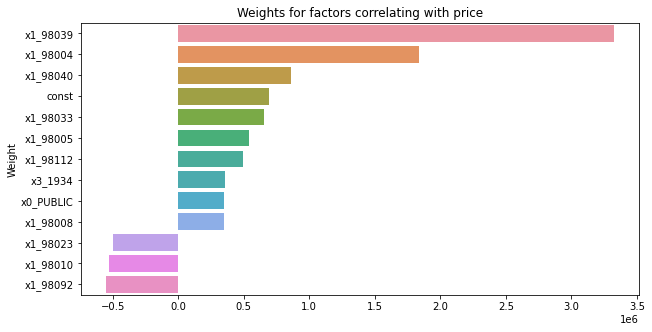

In [72]:
# sorted the weights
sorted_weights = weights.sort_values(ascending=False)

# selected top weights
top_10 = sorted_weights[:10]

# selected bottom weights
bottom_10 = sorted_weights[-3:]

# concated them
selected_weights = pd.concat([top_10, bottom_10])

# plotted
plt.figure(figsize=(10,5))
sns.barplot(y = selected_weights.index, x = selected_weights.values)
plt.title("Weights for factors correlating with price")
plt.ylabel('Weight')
plt.show()


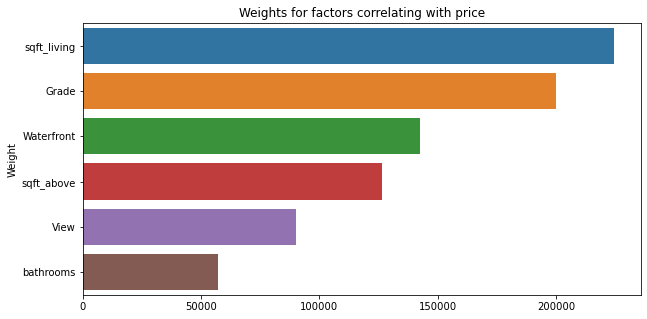

In [73]:
# this is a visualization we included in our presentation

weights = results.params
weights

# sorted the weights and removed the irrelevant features like index
sorted_weights = weights.sort_values(ascending=False)
sorted_weights = sorted_weights[~sorted_weights.index.str.startswith('x')]
sorted_weights = sorted_weights[~sorted_weights.index.str.startswith('con')]
sorted_weights = sorted_weights[~sorted_weights.index.str.startswith('ind')]

#looked at top weights
top_10 = sorted_weights[:6]

# used this to rename the y axis ticks
label_dict = {
    "wf2": "Waterfront", "gradesquared": "Grade", "view2":"View"
    
}

# Replace the old labels with the new labels in your data
top_10.index = [label_dict.get(label, label) for label in top_10.index]

# plot
plt.figure(figsize=(10, 5))
sns.barplot(y=top_10.index, x=top_10.values)
plt.title("Weights for factors correlating with price")
plt.ylabel('Weight')
plt.show()


In [74]:
len(sorted_weights)

12

In [75]:
sorted_weights.tail(140)

sqft_living     224337.858115
gradesquared    199718.835410
wf2             142561.203627
sqft_above      126390.929752
view2            90022.411813
bathrooms        57179.304722
house_cond       45088.571920
nuisance2       -12136.667371
hasbasement     -24267.517175
bedrooms        -58273.981591
floors          -90352.015904
RBoR2           -97673.516031
dtype: float64

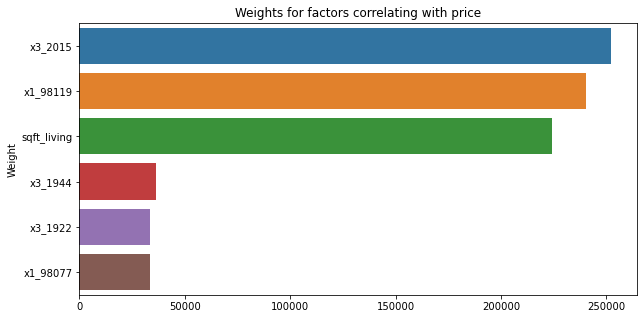

In [76]:
# this is the visualization we included in our presentation

# sort the weights again to make sure
sorted_weights = weights.sort_values(ascending=False)

# select top 3 weights
top_3 = sorted_weights[20:23]

# select bottom 3 weights
bottom_3 = sorted_weights[-140:-137]

# concatenate top and bottom 10
selected_weights = pd.concat([top_3, bottom_3])

# plot
plt.figure(figsize=(10,5))
sns.barplot(y = selected_weights.index, x = selected_weights.values)
plt.title("Weights for factors correlating with price")
plt.ylabel('Weight')
plt.show()

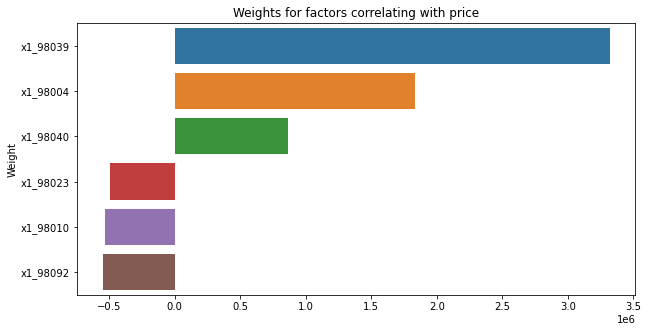

In [77]:
# this is another visualization we included in our presentation

# sort the weights
sorted_weights = weights.sort_values(ascending=False)

# select top 10
top_10 = sorted_weights[:3]

# select bottom 10
bottom_10 = sorted_weights[-3:]

# concatenate top and bottom 10
selected_weights = pd.concat([top_10, bottom_10])

# plot
plt.figure(figsize=(10,5))
sns.barplot(y = selected_weights.index, x = selected_weights.values)
plt.title("Weights for factors correlating with price")
plt.ylabel('Weight')
plt.show()

# Creating Predicted Price Column

In [78]:
# redoing this so that we dont get an error
X_train_ohe =pd.concat([X_dfstan_train.reset_index(drop=True),
                        ohe_train],1)


X_test_ohe =pd.concat([X_dfstan_test.reset_index(drop=True),
                        ohe_test],1)

In [79]:
# redo for error control

lr = LinearRegression()
lr.fit(X_train_ohe, y_train)

lr.score(X_test_ohe, y_test)
# lr.score(X_train_ohe, y_train)

0.6952934560386379

In [80]:
# Applying StandardScaler to numeric columns in X
X_stan = ss.transform(X[numeric_cols])
X_dfstan = pd.DataFrame(X_stan, columns=numeric_cols)

# Applying One Hot Encoder to nominal columns in X
ohe_X = ohe.transform(X[nominal_cols])
ohe_X_df = pd.DataFrame(ohe_X, columns=ohe.get_feature_names(nominal_cols))

# Concating numeric and nominal features
X_ohe = pd.concat([X_dfstan.reset_index(drop=True), ohe_X_df.reset_index(drop=True)], axis=1)

# add predictions to df1:
df1['predicted_price'] = lr.predict(X_ohe)


# Visualization Creation (heatmap) using geopandas

In [81]:
# using this library so that we can merge or concat the zcta file
import geopandas as gpd

In [82]:
# this file is from https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2022&layergroup=ZIP+Code+Tabulation+Areas
# it will help create a map based on zip code
zcta = gpd.read_file('data/tl_2022_us_zcta520/tl_2022_us_zcta520.shp')

In [83]:
#checking new df
zcta.tail(20)

ZCTA5CE20 GEOID20 CLASSFP20 MTFCC20 FUNCSTAT20    ALAND20  AWATER20  \
33771     38587   38587        B5   G6350          S   77373733   4105125   
33772     37760   37760        B5   G6350          S  105436981   7394232   
33773     38473   38473        B5   G6350          S   71866334      1996   
33774     38459   38459        B5   G6350          S   53834958         0   
33775     37719   37719        B5   G6350          S    1693119         0   
33776     37335   37335        B5   G6350          S  114781472     41592   
33777     38328   38328        B5   G6350          S   77632546   1867347   
33778     38560   38560        B5   G6350          S   85385317   9864645   
33779     38070   38070        B5   G6350          S    4366564         0   
33780     37921   37921        B5   G6350          S   41182693     18069   
33781     38122   38122        B5   G6350          S   17655367         0   
33782     37402   37402        B5   G6350          S    3330089    107581   
33783     37918   37918        B5   G6350          S   89506023      6663   
33784     37407   37407        B5   G6350          S    8804866     34008   
33785     37412   37412        B5   G6350          S   22426142         0   
33786     37932   37932        B5   G6350          S   75093217   4374995   
33787     37341   37341        B5   G6350          S   87434962  27139990   
33788     37849   37849        B5   G6350          S  102931713    896866   
33789     37754   37754        B5   G6350          S   99003113    145391   
33790     37806   37806        B5   G6350          S   47070398   1626139   

        INTPTLAT20    INTPTLON20  \
33771  +35.8647610  -085.6139975   
33772  +36.1037645  -083.4663108   
33773  +35.0212463  -087.1716737   
33774  +35.1913337  -086.8021964   
33775  +36.0218622  -084.4280855   
33776  +35.0688983  -086.4039919   
33777  +35.6686971  -088.2085876   
33778  +36.2219258  -085.8556393   
33779  +35.9404369  -089.2491732   
33780  +35.9809706  -083.9969053   
33781  +35.1571021  -089.9224442   
33782  +35.0468053  -085.3162888   
33783  +36.0568747  -083.9173519   
33784  +35.0019426  -085.2897242   
33785  +34.9974366  -085.2271990   
33786  +35.9172993  -084.1987873   
33787  +35.2199309  -085.0730025   
33788  +36.0540502  -084.0484876   
33789  +36.1390993  -084.0298007   
33790  +36.0846931  -083.7279865   

                                                geometry  
33771  POLYGON ((-85.68289 35.82936, -85.68210 35.831...  
33772  POLYGON ((-83.52836 36.14826, -83.52836 36.148...  
33773  POLYGON ((-87.23667 34.99956, -87.23664 34.999...  
33774  POLYGON ((-86.85954 35.19048, -86.85944 35.190...  
33775  POLYGON ((-84.43889 36.01253, -84.43800 36.012...  
33776  POLYGON ((-86.52271 34.99072, -86.52179 34.991...  
33777  POLYGON ((-88.25874 35.67044, -88.25866 35.670...  
33778  POLYGON ((-85.94862 36.29764, -85.94855 36.298...  
33779  POLYGON ((-89.25971 35.93179, -89.25969 35.932...  
33780  POLYGON ((-84.06348 35.99876, -84.06097 35.999...  
33781  POLYGON ((-89.95687 35.16999, -89.95619 35.170...  
33782  MULTIPOLYGON (((-85.31704 35.03599, -85.31653 ...  
33783  POLYGON ((-83.99915 36.03120, -83.99910 36.031...  
33784  POLYGON ((-85.30624 35.00137, -85.30623 35.001...  
33785  POLYGON ((-85.27562 34.99079, -85.27558 34.990...  
33786  POLYGON ((-84.27347 35.93928, -84.27287 35.940...  
33787  POLYGON ((-85.15090 35.11231, -85.15088 35.112...  
33788  POLYGON ((-84.14857 36.04234, -84.14240 36.046...  
33789  POLYGON ((-84.10549 36.11168, -84.10543 36.111...  
33790  MULTIPOLYGON (((-83.78542 36.08103, -83.78461 ...

In [84]:
# Ensuring that the zip code column in both dataframes is a string
df1['zipcodes'] = df1['zipcodes'].astype(str)
zcta['ZCTA5CE20'] = zcta['ZCTA5CE20'].astype(str)

In [85]:
# Assuming your LinearRegression model is called 'lr' and your features DataFrame is called 'X'
print(lr.coef_.shape)
print(X_test_ohe.shape)

(229,)
(8685, 229)


In [86]:
# Merge dataframes
# Merge dataframes
merged = zcta.merge(df1, left_on = 'ZCTA5CE20', right_on= 'zipcodes')

In [87]:
merged.shape

(28949, 55)

In [88]:
merged.columns

Index(['ZCTA5CE20', 'GEOID20', 'CLASSFP20', 'MTFCC20', 'FUNCSTAT20', 'ALAND20',
       'AWATER20', 'INTPTLAT20', 'INTPTLON20', 'geometry', 'index', 'id',
       'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'greenbelt', 'nuisance', 'view', 'condition',
       'grade', 'heat_source', 'sewer_system', 'sqft_above', 'sqft_basement',
       'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated', 'address',
       'lat', 'long', 'zipcodes', 'ZIPCODE', 'PREFERRED_CITY', 'ysb', 'ysr',
       'RecentlyBuiltorRenovated', 'month_sold', 'yr_built_or_renovated',
       'hasbasement', 'bedtobath', 'house_cond', 'grade2', 'view2', 'wf2',
       'nuisance2', 'greenbelt2', 'RBoR2', 'gradesquared', 'predicted_price'],
      dtype='object')

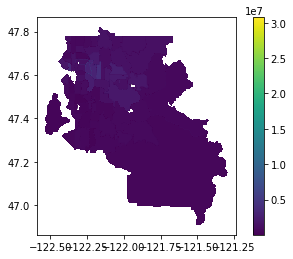

In [89]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
merged.plot(column='price', ax=ax, legend=True)
plt.show()

In [90]:
print(type(merged))

<class 'geopandas.geodataframe.GeoDataFrame'>


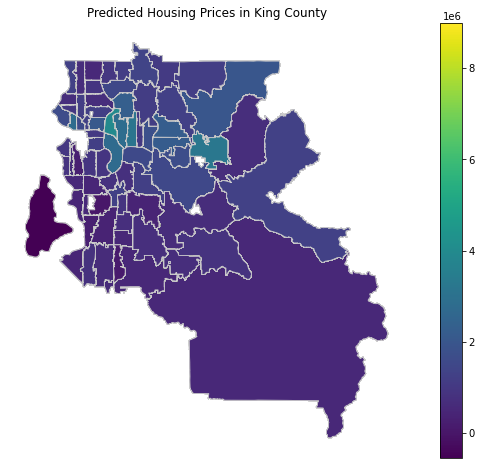

In [91]:
# Plot
fig, ax = plt.subplots(figsize=(12, 8))
merged.plot(column='predicted_price', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Predicted Housing Prices in King County')

# Remove the axis labels and ticks for a cleaner look
ax.set_axis_off()

plt.show()


In [92]:
merged.columns

Index(['ZCTA5CE20', 'GEOID20', 'CLASSFP20', 'MTFCC20', 'FUNCSTAT20', 'ALAND20',
       'AWATER20', 'INTPTLAT20', 'INTPTLON20', 'geometry', 'index', 'id',
       'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'greenbelt', 'nuisance', 'view', 'condition',
       'grade', 'heat_source', 'sewer_system', 'sqft_above', 'sqft_basement',
       'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated', 'address',
       'lat', 'long', 'zipcodes', 'ZIPCODE', 'PREFERRED_CITY', 'ysb', 'ysr',
       'RecentlyBuiltorRenovated', 'month_sold', 'yr_built_or_renovated',
       'hasbasement', 'bedtobath', 'house_cond', 'grade2', 'view2', 'wf2',
       'nuisance2', 'greenbelt2', 'RBoR2', 'gradesquared', 'predicted_price'],
      dtype='object')

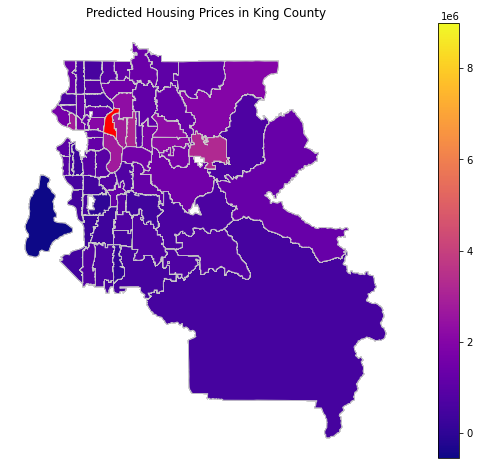

In [93]:
# this is just to see where medina is
# Plot
fig, ax = plt.subplots(figsize=(12, 8))
merged.plot(column='predicted_price', cmap='plasma', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Highlight Medina
medina = merged[merged['ZCTA5CE20'] == '98039']
medina.plot(color='red', linewidth=0.8, edgecolor='0.8', ax=ax)

ax.set_title('Predicted Housing Prices in King County')

# Remove the axis labels and ticks for a cleaner look
ax.set_axis_off()

plt.show()


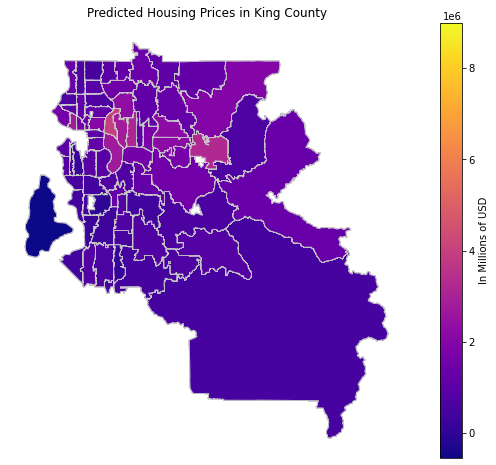

In [94]:
# final visual used in presentation

# Get the ZIP code with the highest predicted price
max_price_zip = merged.loc[merged['predicted_price'].idxmax(), 'ZCTA5CE20']

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
merged.plot(column='predicted_price', cmap='plasma', linewidth=0.8, ax=ax, edgecolor='0.8', 
            legend=True, legend_kwds={'label': "In Millions of USD", 'orientation': "vertical"})

ax.set_title('Predicted Housing Prices in King County')
ax.set_axis_off()

plt.show()


In [95]:
zcta.columns

Index(['ZCTA5CE20', 'GEOID20', 'CLASSFP20', 'MTFCC20', 'FUNCSTAT20', 'ALAND20',
       'AWATER20', 'INTPTLAT20', 'INTPTLON20', 'geometry'],
      dtype='object')

In [ ]:
# we used tableau to create a few more visualizations
# https://public.tableau.com/views/KCoLocalityInfo/Sheet1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link
# https://public.tableau.com/views/KCoLocalitySqFt/Sheet2?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link